[2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 3. 1. 3. 3. 3. 3. 1. 3. 3. 3. 3. 3. 3. 1. 1. 3. 3. 3. 3. 1.
 3. 1. 3. 1. 3. 3. 1. 1. 3. 3. 3. 3. 3. 1. 3. 3. 3. 3. 1. 3. 3. 3. 1. 3.
 3. 3. 1. 3. 3. 1.]


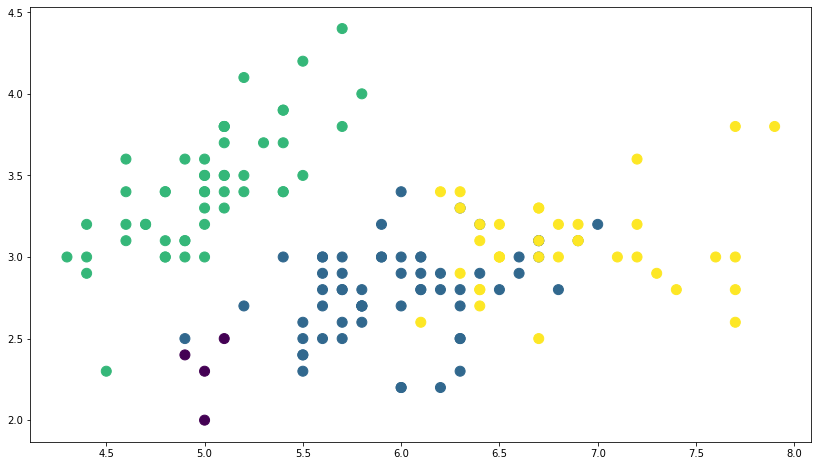

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


class ClusterNode(object):
    def __init__(self, id=None, count=1, left=None, right=None, clusterid=None):
        self.id = id  # Cluster内所有节点编号的集合
        self.count = count  # 子节点个数
        self.left = left  # 左儿子
        self.right = right  # 右儿子
        self.clusterid = clusterid  # Cluster编号


# 计算两Cluster间平均距离
def ClusterDist(nodeA, nodeB, dist, n):
    distsum = 0
    for i in np.nditer(nodeA):
        for j in np.nditer(nodeB):
            distsum = distsum + dist[i, j]
    return distsum / n


# 计算两点间欧式距离
def distEuclid(vecA, vecB):
    return np.sqrt(np.sum(np.power(vecA - vecB, 2)))


class Hierarchical(object):
    def __init__(self, k=1):
        assert k > 0
        self.k = k
        self.labels = []

    def fit(self, dataSet):
        row = np.shape(dataSet)[0]  # 得到行数，即为样本数
        distmap = np.full((row, row), -1.0)
        # 构建所有节点的距离矩阵
        for i in range(row - 1):
            for j in range(i + 1, row):
                distmap[i, j] = distEuclid(dataSet[i, :], dataSet[j, :])
                distmap[j, i] = distmap[i, j]

        nodes = [ClusterNode(id=np.full((1, 1), i), clusterid=i) for i in range(row)]
        currentclustid = -1
        distances = {}
        while len(nodes) > self.k:
            min_dist = np.inf  # 初始设置值为无穷大
            nodes_len = len(nodes)
            closest_part = None  # 表示最相似的两个聚类

            # 找最近的两个Cluster
            for i in range(nodes_len - 1):
                for j in range(i + 1, nodes_len):
                    d_key = (nodes[i].clusterid, nodes[j].clusterid)
                    if d_key not in distances:
                        distances[d_key] = ClusterDist(
                            nodes[i].id, nodes[j].id, distmap,
                            nodes[i].count * nodes[j].count)
                    if distances[d_key] < min_dist:
                        min_dist = distances[d_key]
                        closest_part = (i, j)
            part1, part2 = closest_part
            node1, node2 = nodes[part1], nodes[part2]

            # 删除最近的两个Cluster和其它Cluster的距离
            for i in range(nodes_len):
                d_key = (nodes[i].clusterid, node1.clusterid)
                if d_key in distances:
                    del distances[d_key]
                d_key = (node1.clusterid, nodes[i].clusterid)
                if d_key in distances:
                    del distances[d_key]
                
                d_key = (nodes[i].clusterid, node2.clusterid)
                if d_key in distances:
                    del distances[d_key]
                d_key = (node2.clusterid, nodes[i].clusterid)
                if d_key in distances:
                    del distances[d_key]
                    
            # 合并Cluster
            new_node = ClusterNode(left=node1,
                                   right=node2,
                                   id=np.concatenate((nodes[part1].id, nodes[part2].id)),
                                   count=node1.count + node2.count,
                                   clusterid=currentclustid)
            del nodes[part2], nodes[part1]
            nodes.append(new_node)
            currentclustid -= 1

        self.labels = np.zeros(row)
        for i, node in enumerate(nodes):
            for j in np.nditer(node.id):
                self.labels[j] = i


if __name__ == '__main__':
    iris = datasets.load_iris()
    dataset = iris.data  # [:,0:2]
    k = 4

    #     dataset=np.array([[1.0,0],
    #                       [0,4.0],
    #                       [-1.0,0],
    #                       [4.05,0]])

    my = Hierarchical(k)
    my.fit(dataset)

    # 绘图
    plt.figure(figsize=(14, 8))
    print(my.labels)
    plt.scatter(dataset[:, 0],
                dataset[:, 1],
                marker='o',
                c=my.labels,
                s=100)
    plt.show()